### Fitting a line to data with Python

This notebook will show you how to read data from a file into your code, plot data with errorbars, and fit a line to your data.

We'll play with a subset of the data from the Kaggle dataset <a href="https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data">Climate Change: Earth Surface Temperature Data</a>. The file <a href="">JanuaryGlobalAverageLandTemperatures.csv</a> contains the global average surface temperature in January for years from 1750 to 2015.
It contains three columns of data, the first is the year the second is the average January temperature in $^{\circ}$C, the third is the uncertainty in each temperature measurement.

![png](januaryTempTable.png)

Let's start by loading the numpy and matplotlib.pyplot libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's read in the data using the NumPy function genfromtxt() which will read data from a file into an array. We'll tell the function that the values in the file are separated by commas using the 'delimiter' parameter.

In [3]:
data = np.genfromtxt('JanuaryGlobalAverageLandTemperatures.csv',delimiter=',',dtype=float)

When we print the contents of __data__, we can see that NumPy has used scientific notation to represent all of the values. That's okay for now.

In [4]:
print(data)

[[  1.75000000e+03   3.03400000e+00   3.57400000e+00]
 [  1.75100000e+03   2.49500000e+00   3.46900000e+00]
 [  1.75200000e+03   3.48000000e-01   3.78900000e+00]
 [  1.75300000e+03   2.03900000e+00   3.47800000e+00]
 [  1.75400000e+03   1.57400000e+00   5.02000000e+00]
 [  1.75500000e+03   1.06700000e+00   4.69300000e+00]
 [  1.75600000e+03   3.88700000e+00   3.51300000e+00]
 [  1.75700000e+03  -2.76000000e-01   4.02200000e+00]
 [  1.75800000e+03  -1.50300000e+00   7.34900000e+00]
 [  1.75900000e+03   5.01400000e+00   3.67300000e+00]
 [  1.76000000e+03  -8.11000000e-01   4.56700000e+00]
 [  1.76100000e+03   6.00000000e-01   4.77900000e+00]
 [  1.76200000e+03   6.86600000e+00   3.77600000e+00]
 [  1.76300000e+03   1.36900000e+00   6.41500000e+00]
 [  1.76400000e+03   1.74100000e+00   3.62800000e+00]
 [  1.76500000e+03   3.78000000e+00   4.92800000e+00]
 [  1.76600000e+03  -7.93000000e-01   4.76600000e+00]
 [  1.76700000e+03  -6.43000000e-01   5.65600000e+00]
 [  1.76800000e+03  -2.08000

We want to make a plot with the year on the x-axis and temperature on the y-axis. To retrieve the first column, we use the syntax data[:,0]. Python indices start at 0, so here year is stored in the zeroth column, temperature is in the first, and uncertainty is in the second. Let's assign each to it's own variable:

In [14]:
year = data[:,0]
T = data[:,1]
dT = data[:,2]

In [15]:
print(year)

[ 1750.  1751.  1752.  1753.  1754.  1755.  1756.  1757.  1758.  1759.
  1760.  1761.  1762.  1763.  1764.  1765.  1766.  1767.  1768.  1769.
  1770.  1771.  1772.  1773.  1774.  1775.  1776.  1777.  1778.  1779.
  1780.  1781.  1782.  1783.  1784.  1785.  1786.  1787.  1788.  1789.
  1790.  1791.  1792.  1793.  1794.  1795.  1796.  1797.  1798.  1799.
  1800.  1801.  1802.  1803.  1804.  1805.  1806.  1807.  1808.  1809.
  1810.  1811.  1812.  1813.  1814.  1815.  1816.  1817.  1818.  1819.
  1820.  1821.  1822.  1823.  1824.  1825.  1826.  1827.  1828.  1829.
  1830.  1831.  1832.  1833.  1834.  1835.  1836.  1837.  1838.  1839.
  1840.  1841.  1842.  1843.  1844.  1845.  1846.  1847.  1848.  1849.
  1850.  1851.  1852.  1853.  1854.  1855.  1856.  1857.  1858.  1859.
  1860.  1861.  1862.  1863.  1864.  1865.  1866.  1867.  1868.  1869.
  1870.  1871.  1872.  1873.  1874.  1875.  1876.  1877.  1878.  1879.
  1880.  1881.  1882.  1883.  1884.  1885.  1886.  1887.  1888.  1889.
  1890

Now to make a plot with errorbars. We'll use the matplotlib.pyplot __errorbar()__ function. The first 2 arguments we pass it are our x and y values, then we'll give it the size of the errorbars with the __yerr__ parameter, __fmt__ determines the shape of the points to be plotted. Try playing around with these settings and see how things change.

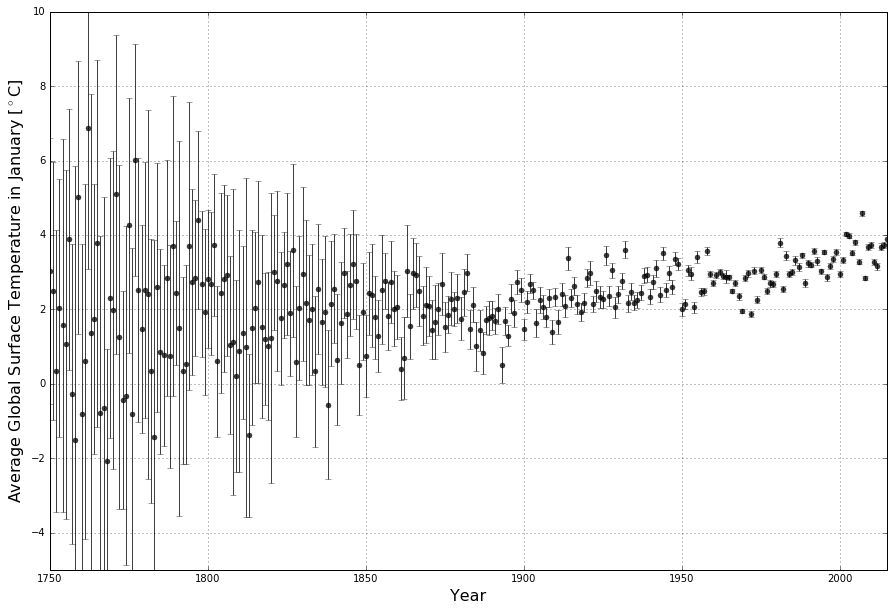

In [41]:
plt.errorbar(year,T,yerr=dT,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
plt.ylim(-5,10) # This sets the range of the x-axis
plt.xlim(1750,2015) # This sets the range of the y-axis
plt.grid(True) # This toggles whether gridlines are displayed
plt.xlabel('Year',fontsize=16)
plt.ylabel('Average Global Surface Temperature in January [$^\circ$C]',fontsize=16)
plt.savefig('/Users/anneya/web/phys2300/assets/img/climatePlot1.png',bbox_inches='tight',dpi=300)

Looks good! It's clear that we can't make very precise measurements of temperature prior to about 1880, but it looks like there might be an upward trend where the measurements are more precise. Let's fit a line to the data. We'll start by defining a function to perform an ordinary least squares fit. Just like you did by hand in PHYS 1100. There are plenty of functions written by other people we could use for this, but let's be explicit for now.

In [30]:
def OLSfit(x, y, dy=None):
    """Find the best fitting parameters of a linear fit to the data through the 
    method of ordinary least squares estimation. (i.e. find m and b for 
    y = m*x + b)
    
    Args:
        x: Numpy array of independent variable data
        y: Numpy array of dependent variable data. Must have same size as x.
        dy: Numpy array of dependent variable standard deviations. Must be same 
            size as y.

    Returns: A list with four floating point values. [m, dm, b, db]
    """
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) - 
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) - 
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x / dy**2) / denom)
    return([m, dm, b, db])

Now, we can pass our year and temperature data to the OLSfit function, and it will return values for the slope and intercept of the best fit line and their uncertainties.

In [34]:
bestfit = OLSfit(year,T,dT)
print(bestfit)
slope = bestfit[0]
intercept = bestfit[2]

[0.014592999244513271, 0.0003514327187763885, -25.835436284223032, 0.015636340488392238]


This means the best fit line to our data has a slope of $0.01459\pm0.00035\,^{\circ}$C/year and a y-intercept of $-25.835\pm0.016^{\circ}$C. Now we can replot the data with the best fit line included. To plot this line, we'll create an array of evenly spaced values for the  axis, and then calculate the value of the equation of this line at each of them.

In [38]:
# Create an array of values starting at 1750, going up to 2100, with steps on 10
xForLine = np.arange(1750.,2150.,10.) 
# Calculate the value of temperature = slope * year + intercept at each x
yForLine = slope*xForLine + intercept

Now we'll make the plot and include code to plot the line itself.

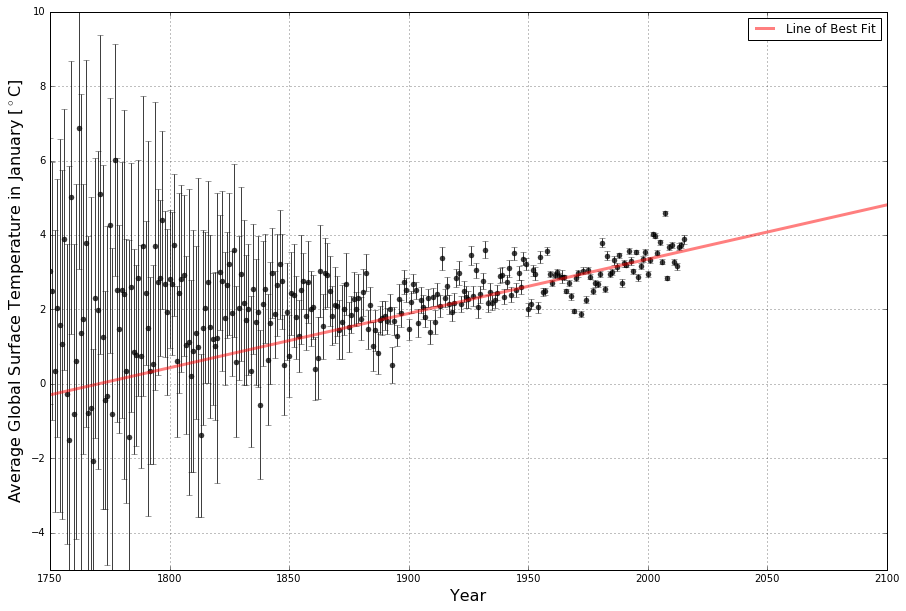

In [42]:
plt.errorbar(year,T,yerr=dT,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
plt.ylim(-5,10) # This sets the range of the x-axis
plt.xlim(1750,2100) # This sets the range of the y-axis
plt.grid(True) # This toggles whether gridlines are displayed
plt.xlabel('Year',fontsize=16)
plt.ylabel('Average Global Surface Temperature in January [$^\circ$C]',fontsize=16)

# Add the line
plt.plot(xForLine,yForLine,lw=3,color='red',alpha=0.5,label='Line of Best Fit')

# Add a legend
plt.legend()
plt.savefig('/Users/anneya/web/phys2300/assets/img/climatePlot2.png',bbox_inches='tight',dpi=300)